In [1]:
from carbon import CarbonSimulatorUI, CarbonOrderUI, P, __version__, __date__
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
print(f"Carbon v{__version__} ({__date__})")
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSimulatorUI))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonOrderUI))

Carbon v2.2-BETA7 (19/Jan/2022)
CarbonSimulatorUI v2.4 (12/Jan/2023)
CarbonOrderUI v1.6 (20/Jan/2023)


# Carbon Order UI extensions (NBTest 50)

NBTEST: NOTEST_DEFAULT = TEST

## carbonorderui ids and data

In [2]:
Sim = CarbonSimulatorUI(pair="ETH/USDC")
Sim.add_strategy("ETH", 1, 2000, 2500, 750, 1250, 1000)
ouis = Sim.state()["orderuis"]
ouis

{0: CarbonOrderUI(pair=ETH/USDC, tkn=ETH, B=0.02, S=0.0023606797749978967, yint=1.0, y=1.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, tkn=USDC, B=31.622776601683793, S=3.732562457643585, yint=750.0, y=750.0, id=1, linked=<0>)}

In [3]:
# check that the id corresponds to the own dict key
assert ouis[0].id == 0
assert ouis[1].id == 1

# check that the lid corresponds to the other dict key
assert ouis[0].lid == 1
assert ouis[1].lid == 0

# check that the linked objects are correct
assert ouis[0].linked is ouis[1]
assert ouis[1].linked is ouis[0]

In [4]:
# check curve data
assert ouis[0].pair.slashpair == "ETH/USDC"
assert ouis[1].pair.slashpair == "ETH/USDC"
assert ouis[0].tkn == "ETH"
assert ouis[1].tkn == "USDC"

# prices
assert ouis[0].pa == 2000
assert ouis[0].pb == 2500
assert ouis[1].pa == 1250
assert ouis[1].pb == 1000

# raw prices
assert ouis[0].pa_raw == 1/2000
assert ouis[0].pb_raw == 1/2500
assert ouis[1].pa_raw == 1250
assert ouis[1].pb_raw == 1000

# y, yint, pmarg
assert ouis[0].y == 1
assert ouis[0].yint == 1
assert ouis[0].p_marg == ouis[0].pa
assert ouis[1].y == 750
assert ouis[1].yint == 750
assert ouis[1].p_marg == ouis[1].pa

## carbonorderui addliqy

In [5]:
Sim = CarbonSimulatorUI(pair="ETH/USDC")
Sim.add_strategy("ETH", 1, 2000, 2500, 750, 1250, 1000)
ouis = Sim.state()["orderuis"]
ouis

{0: CarbonOrderUI(pair=ETH/USDC, tkn=ETH, B=0.02, S=0.0023606797749978967, yint=1.0, y=1.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, tkn=USDC, B=31.622776601683793, S=3.732562457643585, yint=750.0, y=750.0, id=1, linked=<0>)}

In [6]:
# y, yint, pmarg
assert ouis[0].y == 1
assert ouis[0].yint == 1
assert ouis[0].p_marg == ouis[0].pa
assert ouis[1].y == 750
assert ouis[1].yint == 750
assert ouis[1].p_marg == ouis[1].pa

In [7]:
try:
    ouis[0].addliqy(0.5, expandcurve=False)
    raise RuntimeError("should raise")
except ValueError as e:
    print(e)

('Must expand curve and expandcurve=False', 1.0, 0.5, 1.5, 1.0)


In [8]:
r = ouis[0].addliqy(0.5)
assert r["y_old"] == 1
assert r["y"] == 1.5
assert r["dy"] == 0.5
assert r["yint_old"] == 1
assert r["yint"] == 1.5
assert r["pmarg_old"] == 2000
assert r["pmarg"] == 2000
assert r["tkny"] == "ETH"
assert r["expanded"] == True
r

{'y_old': 1.0,
 'y': 1.5,
 'dy': 0.5,
 'yint_old': 1.0,
 'yint': 1.5,
 'tkny': 'ETH',
 'pmarg_old': 2000.0,
 'pmarg': 2000.0,
 'expanded': True}

## carbonorderui trading

In [9]:
Sim = CarbonSimulatorUI(pair="ETH/USDC")
Sim.add_strategy("ETH", 1, 2000, 2500, 750, 1250, 1000)
ouis = Sim.state()["orderuis"]
ouis

{0: CarbonOrderUI(pair=ETH/USDC, tkn=ETH, B=0.02, S=0.0023606797749978967, yint=1.0, y=1.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, tkn=USDC, B=31.622776601683793, S=3.732562457643585, yint=750.0, y=750.0, id=1, linked=<0>)}

In [10]:
# y, yint, pmarg
assert ouis[0].y == 1
assert ouis[0].yint == 1
assert ouis[0].p_marg == ouis[0].pa
assert ouis[1].y == 750
assert ouis[1].yint == 750
assert ouis[1].p_marg == ouis[1].pa

In [11]:
# check that the linked objects are correct
assert ouis[0].linked is ouis[1]
assert ouis[1].linked is ouis[0]

### trade 1: bysource[selly]

In [12]:
r = ouis[0].selly(0.5)
l = r["linked"]
assert r["action"] == "bysource[selly]"
assert r["executed"] == True
assert r["y_old"] == 1
assert r["y"] == 0.5
assert r["dy"] == 0.5
assert r["expanded"] == False
assert round(r["x"],4) == 1055.7281
assert round(r["dx"],4) == 1055.7281
assert r["x"] == r["dx"]
assert r["pmarg_old"] == 2000
assert round(r["pmarg"],4) == 2229.1236
assert round(r["dx/dy"],4) == 2111.4562
assert l["y_old"] == 750
assert l["y"] == l["y_old"] + l["dy"]
assert l["dy"] == r["dx"]
assert l["pmarg_old"] == 1250
assert l["pmarg"] == 1250
assert round(l["yint_old"],4) == 750
assert round(l["yint"],4) == 1805.7281
assert l["expanded"] == True
assert l["tkny"] == "USDC"
l0 = l
#r

### trade 2: bysource[selly]

In [13]:
r = ouis[0].selly(0.1)
l = r["linked"]
assert r["action"] == "bysource[selly]"
assert r["executed"] == True
assert r["y_old"] == 0.5
assert r["y"] == 0.4
assert r["dy"] == 0.1
assert r["expanded"] == False
assert round(r["x"],4) == 1281.1529
assert round(r["dx"],4) == 225.4249
assert round(r["pmarg_old"],4) == 2229.1236
assert round(r["pmarg"],4) == 2279.6568
assert round(r["dx/dy"],4) == 2254.2486
assert l["y_old"] == l0["y"]
assert l["y"] == l["y_old"] + l["dy"]
assert l["dy"] == r["dx"]
assert l["pmarg_old"] == 1250
assert l["pmarg"] == 1250
assert round(l["yint_old"],4) == 1805.7281
assert round(l["yint"],4) == 2031.1529
assert l["expanded"] == True
assert l["tkny"] == "USDC"
l0 = l
#r

### trade 3: bytarget[buyx]

In [14]:
r = ouis[0].buyx(100)
l = r["linked"]
assert r["action"] == "bytarget[buyx]"
assert r["executed"] == True
assert r["y_old"] == 0.4
assert round(r["y"],4) == 0.3563
assert round(r["dy"],4) == 0.0437
assert r["expanded"] == False
assert round(r["x"],4) == 1381.1529
assert round(r["dx"],4) == 100
assert round(r["pmarg_old"],4) == 2279.6568
assert round(r["pmarg"],4) == 2302.2550
assert round(r["dx/dy"],4) == 2290.9280
assert l["y_old"] == l0["y"]
assert l["y"] == l["y_old"] + l["dy"]
assert l["dy"] == r["dx"]
assert l["pmarg_old"] == 1250
assert l["pmarg"] == 1250
assert round(l["yint_old"],4) == 2031.1529
assert round(l["yint"],4) == 2131.1529
assert l["expanded"] == True
assert l["tkny"] == "USDC"
l0 = l
#r

### trade 4: byprice[tradeto]

In [15]:
r = ouis[0].tradeto(2330)
l = r["linked"]
assert r["action"] == "byprice[tradeto]"
assert r["executed"] == True
assert round(r["y_old"],4) == 0.3563
assert round(r["y"],4) == 0.3036
assert round(r["dy"],4) == 0.0527
assert r["expanded"] == False
assert round(r["x"],4) == 1503.2594
assert round(r["dx"],4) == 122.1064
assert round(r["pmarg_old"],4) == 2302.2550
assert round(r["pmarg"],4) == 2330.0
assert round(r["dx/dy"],4) == 2316.0860
assert l["y_old"] == l0["y"]
assert l["y"] == l["y_old"] + l["dy"]
assert l["dy"] == r["dx"]
assert l["pmarg_old"] == 1250
assert l["pmarg"] == 1250
assert round(l["yint_old"],4) == 2131.1529
assert round(l["yint"],4) == 2253.2594
assert l["expanded"] == True
assert l["tkny"] == "USDC"
l0 = l
#r

## tradeto basics

In [16]:
Sim = CarbonSimulatorUI(pair="ETH/USDC")
Sim.add_strategy("ETH", 1, 2000, 2500, 750, 1250, 1000)
ouis = Sim.state()["orderuis"]
ouis

{0: CarbonOrderUI(pair=ETH/USDC, tkn=ETH, B=0.02, S=0.0023606797749978967, yint=1.0, y=1.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, tkn=USDC, B=31.622776601683793, S=3.732562457643585, yint=750.0, y=750.0, id=1, linked=<0>)}

In [17]:
# y, yint, pmarg
assert ouis[0].y == 1
assert ouis[0].yint == 1
assert ouis[0].p_marg == ouis[0].pa
assert ouis[1].y == 750
assert ouis[1].yint == 750
assert ouis[1].p_marg == ouis[1].pa

In [18]:
# check that the linked objects are correct
assert ouis[0].linked is ouis[1]
assert ouis[1].linked is ouis[0]

In [19]:
# ensure the correct PriceOutOfBoundsError is raised
try:
    ouis[0].yfromp_f(1000, raiseonerror=True)
    raise RuntimeError("should raise")
except ouis[0].PriceOutOfBoundsErrorBeyondStart as e:
    print(e)

try:
    ouis[0].yfromp_f(3000, raiseonerror=True)
    raise RuntimeError("should raise")
except ouis[0].PriceOutOfBoundsErrorBeyondEnd as e:
    print(e)

('Price out of bounds (beyond start)', 1000, 2000.0)
('Price out of bounds (beyond end)', 3000, 2500.0)


In [20]:
# ensure PriceOutOfBoundsError is raised
try:
    ouis[0].yfromp_f(1000, raiseonerror=True)
    raise RuntimeError("should raise")
except ouis[0].PriceOutOfBoundsError as e:
    print(e)
    
try:
    ouis[0].yfromp_f(3000, raiseonerror=True)
    raise RuntimeError("should raise")
except ouis[0].PriceOutOfBoundsError as e:
    print(e)

('Price out of bounds (beyond start)', 1000, 2000.0)
('Price out of bounds (beyond end)', 3000, 2500.0)


In [21]:
# ensure ValueError is still captured
try:
    ouis[0].yfromp_f(1000, raiseonerror=True)
    raise RuntimeError("should raise")
except ValueError as e:
    print(e)
    
try:
    ouis[0].yfromp_f(3000, raiseonerror=True)
    raise RuntimeError("should raise")
except ValueError as e:
    print(e)

('Price out of bounds (beyond start)', 1000, 2000.0)
('Price out of bounds (beyond end)', 3000, 2500.0)


In [22]:
# ensure that going the wrong way beyond boundaries leads to dy=0, executed=False
r = ouis[0].tradeto(1000)
assert r["action"] == "byprice[tradeto]"
assert r["dy"] == 0
assert r["executed"] == False
#r

In [23]:
# ensure that going the right way yet beyond boundaries leads to full execution
r = ouis[0].tradeto(3000)
l = r["linked"]
assert r["action"] == "byprice[tradeto]"
assert r["executed"] == True
assert r["y_old"] == 1
assert r["y"] == 0
assert r["dy"] == 1
assert r["expanded"] == False
assert round(r["x"],4) == 2236.0680
assert round(r["dx"],4) == 2236.0680
assert r["x"] == r["dx"]
assert r["pmarg_old"] == 2000
assert r["pmarg"] == 2500
assert round(r["dx/dy"],4) == 2236.0680
assert l["y_old"] == 750
assert l["y"] == l["y_old"] + l["dy"]
assert l["dy"] == r["dx"]
assert l["pmarg_old"] == 1250
assert l["pmarg"] == 1250
assert round(l["yint_old"],4) == 750
assert round(l["yint"],4) == 2986.0680
assert l["expanded"] == True
assert l["tkny"] == "USDC"
#r

In [24]:
# ensure you can't trade back
r = ouis[0].tradeto(2250)
assert r["action"] == "byprice[tradeto]"
assert r["dy"] == 0
assert r["executed"] == False
#r

## tradeto over linked orders

In [25]:
Sim = CarbonSimulatorUI(pair="ETH/USDC")
Sim.add_strategy("ETH", 1, 2000, 2500, 0, 1250, 1000)
ouis = Sim.state()["orderuis"]
ouis

{0: CarbonOrderUI(pair=ETH/USDC, tkn=ETH, B=0.02, S=0.0023606797749978967, yint=1.0, y=1.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, tkn=USDC, B=31.622776601683793, S=3.732562457643585, yint=0.0, y=0.0, id=1, linked=<0>)}

In [26]:
# y, yint, pmarg
assert ouis[0].y == 1
assert ouis[0].yint == 1
assert ouis[0].p_marg == ouis[0].pa
assert ouis[1].y == 0
assert ouis[1].yint == 0
assert ouis[1].p_marg == ouis[1].pa

In [27]:
# check that the linked objects are correct
assert ouis[0].linked is ouis[1]
assert ouis[1].linked is ouis[0]

In [28]:
r0 = ouis[0].tradeto(3000)
r1 = ouis[1].tradeto(3000)
assert r0["dy"] == 1 
assert r1["dy"] == 0 
assert r0["pmarg"] == 2500 
assert r1["pmarg"] == 1250 
#r0

In [29]:
r0 = ouis[0].tradeto(500)
r1 = ouis[1].tradeto(500)
assert round(r0["dy"],4) == 0
assert round(r1["dy"],4) == 2236.0680
assert r0["pmarg"] == 2500 
assert r1["pmarg"] == 1000 
#r1

In [30]:
r0 = ouis[0].tradeto(3000)
r1 = ouis[1].tradeto(3000)
assert round(r0["dy"],4) == 2
assert round(r1["dy"],4) == 0
assert r0["pmarg"] == 2500 
assert r1["pmarg"] == 1250 
#r0

## more tradeto over linked orders

In [31]:
Sim = CarbonSimulatorUI(pair="ETH/USDC")
Sim.add_strategy("ETH", 1, 2000, 2500, 0, 1250, 1000)
ouis = Sim.state()["orderuis"]
ouis

{0: CarbonOrderUI(pair=ETH/USDC, tkn=ETH, B=0.02, S=0.0023606797749978967, yint=1.0, y=1.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, tkn=USDC, B=31.622776601683793, S=3.732562457643585, yint=0.0, y=0.0, id=1, linked=<0>)}

In [32]:
# y, yint, pmarg
assert ouis[0].y == 1
assert ouis[0].yint == 1
assert ouis[0].p_marg == ouis[0].pa
assert ouis[1].y == 0
assert ouis[1].yint == 0
assert ouis[1].p_marg == ouis[1].pa

In [33]:
# check that the linked objects are correct
assert ouis[0].linked is ouis[1]
assert ouis[1].linked is ouis[0]

In [34]:
assert ouis[0].tkn == "ETH"
assert ouis[1].tkn == "USDC"
ethamt_r  = [ouis[0].y]
usdcamt_r = [ouis[1].y]
for ix in range(5):
    
    # trade up to 3000
    r0 = ouis[0].tradeto(3000)
    r1 = ouis[1].tradeto(3000)
    ethamt_r  += [ouis[0].y]
    usdcamt_r += [ouis[1].y]
    
    # trade back down to 500
    r0 = ouis[0].tradeto(500)
    r1 = ouis[1].tradeto(500)
    ethamt_r  += [ouis[0].y]
    usdcamt_r += [ouis[1].y]

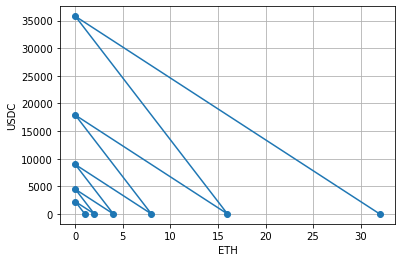

In [35]:
#plt.scatter(x=ethamt_r, y=usdcamt_r)
plt.plot(ethamt_r, usdcamt_r, "-o")
plt.xlabel("ETH")
plt.ylabel("USDC")
plt.grid()

In [36]:
assert [round(x,0) for x in ethamt_r]  == [1, 0, 2, 0, 4, 0, 8, 0, 16, 0, 32]
assert [round(x,0) for x in usdcamt_r] == [0, 2236, 0, 4472, 0, 8944, 0, 17889, 0, 35777, 0]